# MODEL SELECTION

# 1) Ridge Regression

# $RSS + \alpha \sum_{j=1}^{d}\hat{\beta }_{j}^{2}$

<b>By adding a new term to the RSS term in Ridge Regression, it aims to reduce the coefficients of the variables that do not contribute to the correlation. While determining the coefficients in the Ridge regression, the above term is tried to be minimized instead of RSS.</b>

<b>You can think of the alpha in front of the total as a correction coefficient. This coefficient is determined by the user. With the help of this term, the beta coefficients are reduced. If the alpha value to be used is equal to zero, the result will be the same as the sum of the smallest squares. On the other hand, as the alpha value gets larger, the beta coefficients approach zero. For this reason, the selection of the alpha value that will give the best result is very important. For the alpha value that will give the most successful result, cross validation methods can be used.</b>

<b>Ridge() function from the sklearn.linear_model module is used for Ridge regression in Python. In this function, we specify the value of $\alpha $ with alpha argument. Also, by using the normalize=True argument, it is ensured that all variables are normalized and brought to the same scale.</b>

In [87]:
import pandas as pd

bostondf = pd.read_csv('Boston.csv')

X = bostondf.drop('medv',axis=1)
y = bostondf['medv']

In [88]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1,normalize=True)
ridge_model.fit(X,y)
ridge_model.score(X,y)

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.7315784496375433

In [89]:
ridge_model.intercept_

26.437529739426683

In [90]:
ridge_model.coef_

array([-8.39972182e-02,  3.01457989e-02, -4.51085108e-02,  2.91942377e+00,
       -1.07499818e+01,  4.02329138e+00, -4.56047447e-03, -1.03180235e+00,
        1.30441043e-01, -4.95778250e-03, -8.32529832e-01,  8.96754880e-03,
       -4.57771753e-01])

<b>Let's write a code that will do cross validation for different alpha values. First, let's create a logarithmic array from -4 to 0.1 (np.logspace(-4,0.1,100)). We use these values as alpha values in the for loop we created. For each alpha value We perform a 5-fold cross validation and record the average of the generated $R_{2}$ values (the cross_val_score function calculates the $R_{2}$ values), and then we select the alpha value that gives the highest $R_{2}$ value.</b>

In [91]:
import numpy as np
from sklearn.model_selection import cross_val_score

alpha_values = np.logspace(-4,0.1,100)

ridge_R2 = []

ridge_model = Ridge(normalize=True)

for alpha in alpha_values:
    ridge_model.alpha = alpha
    ridge_cv = cross_val_score(ridge_model,X,y,cv=5)
    ridge_R2.append(np.mean(ridge_cv))

ind = ridge_R2.index(max(ridge_R2))
ind

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the prev

84

In [92]:
alpha_values[ind]

0.3011534749602565

<b>Let's see our results in a graph with alpha value and $R^{2}$ values.</b>

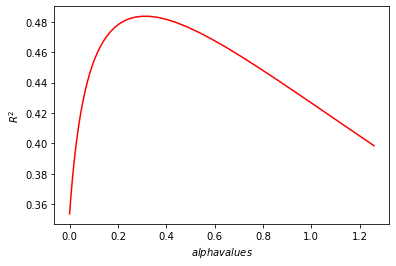

In [93]:
import  matplotlib.pyplot as plt

plt.plot(alpha_values,ridge_R2,'r-')
plt.xlabel('$alpha values$')
plt.ylabel('$R^{2}$')

plt.show()

# 2) Lasso Regression

<b>Lasso regression is also similar to Ridge regression. The aim is to reduce the coefficients of variables that have little contribution to the model. The advantage of Lasso regression over Ridge regression is that it produces coefficients equal to zero, allowing the removal of unnecessary variables.</b>



# $RSS + \alpha \sum_{j=1}^{d}\left|\hat{\beta _{j}} \right|$

In [94]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1,normalize=True)
lasso_model.fit(X,y)
lasso_model.score(X,y)

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.582783041818264

In [95]:
lasso_model.intercept_

13.957552992158897

In [96]:
lasso_model.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439])

<b>When we examine the coefficients produced by the Ridge and Lasso regressions, we see that the coefficients of the unimportant variables for the model are calculated as very small values in the Ridge regression, while the coefficients exactly equal to zero are produced for these variables in Lasso.</b>